<a href="https://colab.research.google.com/github/Elmar1101/Data_science_projects/blob/main/TrainingDeepNeuronNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

tf.keras.layers.Dense(10,activation='relu',kernel_initializer='he_normal')

<Dense name=dense, built=False>

# Leaky Relu

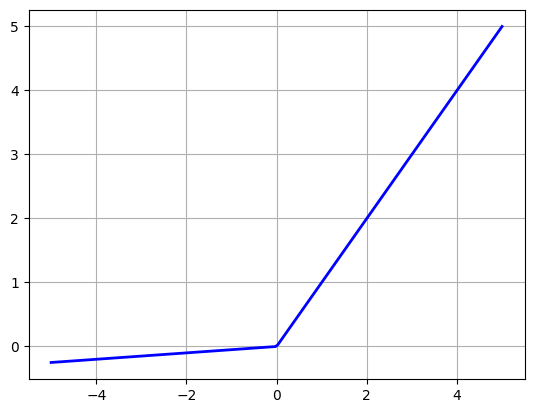

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(z,alpha=0.01):
    return np.maximum(alpha*z,z)

z=np.linspace(-5,5,200)

plt.plot(z, leaky_relu(z,0.05), 'b-', linewidth=2,label=r'Leaky ReLU')
plt.grid();

In [ ]:
leaky_relu=tf.keras.layers.LeakyReLU(negative_slope=0.01)
tf.keras.layers.Dense(10,activation=leaky_relu,kernel_initializer='he_normal')

<Dense name=dense_1, built=False>

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='leaky_relu',kernel_initializer='he_normal')
])

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full), (X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test=X_train/255.0,X_valid/255.0,X_test/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='leaky_relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,kernel_initializer='he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='glorot_normal')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10,
          validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4811 - loss: 1.6646 - val_accuracy: 0.7058 - val_loss: 0.8994
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7183 - loss: 0.8573 - val_accuracy: 0.7500 - val_loss: 0.7219
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7615 - loss: 0.7173 - val_accuracy: 0.7776 - val_loss: 0.6437
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7853 - loss: 0.6447 - val_accuracy: 0.7910 - val_loss: 0.5990
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7975 - loss: 0.6033 - val_accuracy: 0.8054 - val_loss: 0.5629
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8120 - loss: 0.5651 - val_accuracy: 0.8150 - val_loss: 0.5396
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8171 - loss: 0.5434 - val_accuracy: 0.8196 - val_loss: 0.5224
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8217 - loss: 0.53

# ELU

In [ ]:
tf.keras.layers.Dense(10,activation='elu',kernel_initializer='he_normal')

<Dense name=dense_6, built=False>

# SELU

In [ ]:
tf.keras.layers.Dense(50,activation='selu',kernel_initializer='lecun_normal')

<Dense name=dense_7, built=False>

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten()
])

for i in range (100):
    model.add(tf.keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='lecun_normal'))

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
pixel_means=X_train.mean(axis=0,keepdims=True)
pixel_stds=X_train.std(axis=0,keepdims=True)
X_train_scaled=(X_train-pixel_means)/pixel_stds
X_valid_scaled=(X_valid-pixel_means)/pixel_stds
X_test_scaled=(X_test-pixel_means)/pixel_stds

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.4490 - loss: 1.4426 - val_accuracy: 0.7290 - val_loss: 0.7853
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.7282 - loss: 0.7799 - val_accuracy: 0.7866 - val_loss: 0.6211


In [ ]:

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten()
])
for i in range(100):
    model.add(tf.keras.layers.Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='glorot_normal'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=5,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.0970 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3026
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1010 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3026
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0992 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.0999 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.1001 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027


# Batch Normalization

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,kernel_initializer='he_normal',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,kernel_initializer='he_normal',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,kernel_initializer='glorot_normal',activation='softmax'),


])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_210 (Dense)                    │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_211 (Dense)                    │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_212 (Dense)                    │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [ ]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5782 - loss: 1.2745 - val_accuracy: 0.7876 - val_loss: 0.6212
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7810 - loss: 0.6451 - val_accuracy: 0.8120 - val_loss: 0.5317


# Gradient Clipping

In [ ]:
optimizer=tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crosssentropy',optimizer=optimizer)

In [ ]:
optimizer=tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss='sparse_categorical_crosssentropy',optimizer=optimizer)

# Reusing Pretrained Layers

In [ ]:
poss_class_id=class_names.index('Pullover')
neg_class_id=class_names.index('T-shirt/top')

def split_dataset(X,y):
    y_for_B=(y==poss_class_id) | (y==neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B]==poss_class_id).astype(np.float32)
    old_class_ids=list(set(range(10))-set([neg_class_id,poss_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids,range(8)):
        y_A[y_A==old_class_id]=new_class_id
    return (([X[~y_for_B],y_A]),(X[y_for_B],y_B))

(X_train_A,y_train_A),(X_train_B,y_train_B)=split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B)=split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B)=split_dataset(X_test,y_test)
X_train_B=X_train_B[:200]
y_train_B=y_train_B[:200]

tf.random.set_seed(42)

model_A=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='glorot_normal'),

])

model_A.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model_A.fit(X_train_A,y_train_A,epochs=3,validation_data=(X_valid_A,y_valid_A))

model_A.save('my_model_A.keras')

Epoch 1/3
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5174 - loss: 1.6164 - val_accuracy: 0.7799 - val_loss: 0.7616
Epoch 2/3
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7948 - loss: 0.7038 - val_accuracy: 0.8280 - val_loss: 0.5611
Epoch 3/3
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8353 - loss: 0.5447 - val_accuracy: 0.8476 - val_loss: 0.4797


In [ ]:
tf.random.set_seed(42)

model_B = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1,activation='sigmoid',kernel_initializer='glorot_normal')
])

model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history=model_B.fit(X_train_B,y_train_B,epochs=20,validation_data=(X_valid_B,y_valid_B))

model_B.evaluate(X_test_B,y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4688 - loss: 0.7065 - val_accuracy: 0.5272 - val_loss: 0.6907
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5260 - loss: 0.6816 - val_accuracy: 0.6162 - val_loss: 0.6685
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6185 - loss: 0.6584 - val_accuracy: 0.6904 - val_loss: 0.6475
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7041 - loss: 0.6361 - val_accuracy: 0.7428 - val_loss: 0.6274
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7518 - loss: 0.6147 - val_accuracy: 0.7844 - val_loss: 0.6082
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8147 - loss: 0.5944 - val_accuracy: 0.8131 - val_loss: 0.5898
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8308 - loss: 0.5751 - val_accuracy: 0.8497 - val_loss: 0.5723
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8573 - loss: 0.5567 - val_accuracy: 0.8675 - val_loss: 0.5558


[0.41601425409317017, 0.9125000238418579]

In [ ]:
model_A=tf.keras.models.load_model('my_model_A.keras')
model_B_on_A=tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_A_clone=tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
model_B_on_A=tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
for layer in model.layers[:-1]:
    layer.trainable=False

model_B_on_A.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                     metrics=['accuracy'])

In [ ]:
model_B_on_A.fit(X_train_B,y_train_B,epochs=4,validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4320 - loss: 0.9427 - val_accuracy: 0.4886 - val_loss: 0.7149
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4792 - loss: 0.7233 - val_accuracy: 0.5529 - val_loss: 0.6434
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5874 - loss: 0.6502 - val_accuracy: 0.7033 - val_loss: 0.6098
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7171 - loss: 0.6130 - val_accuracy: 0.7893 - val_loss: 0.5847


In [ ]:
for layer in model.layers[:-1]:
    layer.trainable=True
model_B_on_A.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])

model_B_on_A.fit(X_train_B,y_train_B,epochs=16,validation_data=(X_valid_B,y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7822 - loss: 0.5852 - val_accuracy: 0.8338 - val_loss: 0.5628
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8523 - loss: 0.5616 - val_accuracy: 0.8586 - val_loss: 0.5435
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8717 - loss: 0.5409 - val_accuracy: 0.8773 - val_loss: 0.5260
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8914 - loss: 0.5221 - val_accuracy: 0.8853 - val_loss: 0.5098
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9118 - loss: 0.5047 - val_accuracy: 0.8961 - val_loss: 0.4947
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9226 - loss: 0.4885 - val_accuracy: 0.9021 - val_loss: 0.4807
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9226 - loss: 0.4735 - val_accuracy: 0.9070 - val_loss: 0.4676
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9314 - loss: 0.4594 - val_accuracy: 0.9060 - val_loss: 0.4553


In [ ]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9284 - loss: 0.3889


[0.38960158824920654, 0.9269999861717224]

In [ ]:
def build_model(seed=420):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=[28,28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10,activation='softmax')
    ])

def build_and_train_model(optimizer):
    model=build_model()
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)


In [ ]:
history_sgd=build_and_train_model(optimizer)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7183 - loss: 0.8462 - val_accuracy: 0.8460 - val_loss: 0.4174
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8441 - loss: 0.4388 - val_accuracy: 0.8596 - val_loss: 0.3809
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8627 - loss: 0.3795 - val_accuracy: 0.8674 - val_loss: 0.3626
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8754 - loss: 0.3425 - val_accuracy: 0.8702 - val_loss: 0.3547
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8878 - loss: 0.3135 - val_accuracy: 0.8708 - val_loss: 0.3513


# Nesterov

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True)
history_nesterov=build_and_train_model(optimizer)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7210 - loss: 0.8468 - val_accuracy: 0.8412 - val_loss: 0.4235
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8409 - loss: 0.4480 - val_accuracy: 0.8572 - val_loss: 0.3911
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8605 - loss: 0.3903 - val_accuracy: 0.8640 - val_loss: 0.3734
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8733 - loss: 0.3533 - val_accuracy: 0.8682 - val_loss: 0.3667
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8842 - loss: 0.3246 - val_accuracy: 0.8696 - val_loss: 0.3642


# AdaGrad

In [ ]:
optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [ ]:
history_Adagrad=build_and_train_model(optimizer)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6024 - loss: 1.2335 - val_accuracy: 0.8032 - val_loss: 0.5831
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7808 - loss: 0.6415 - val_accuracy: 0.8226 - val_loss: 0.5120
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8036 - loss: 0.5721 - val_accuracy: 0.8306 - val_loss: 0.4786
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8156 - loss: 0.5351 - val_accuracy: 0.8364 - val_loss: 0.4587
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8231 - loss: 0.5106 - val_accuracy: 0.8380 - val_loss: 0.4451


# RMSprop

In [ ]:
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001)

In [ ]:
history_rmsprop=build_and_train_model(optimizer)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7747 - loss: 0.6259 - val_accuracy: 0.8638 - val_loss: 0.3652
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8577 - loss: 0.3893 - val_accuracy: 0.8668 - val_loss: 0.3514
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8795 - loss: 0.3310 - val_accuracy: 0.8700 - val_loss: 0.3490
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8941 - loss: 0.2923 - val_accuracy: 0.8740 - val_loss: 0.3551
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9030 - loss: 0.2638 - val_accuracy: 0.8760 - val_loss: 0.3736


# Adam Optimization

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
history_adam=build_and_train_model(optimizer)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7767 - loss: 0.6414 - val_accuracy: 0.8632 - val_loss: 0.3683
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8585 - loss: 0.3882 - val_accuracy: 0.8700 - val_loss: 0.3474
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8776 - loss: 0.3319 - val_accuracy: 0.8740 - val_loss: 0.3390
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8912 - loss: 0.2938 - val_accuracy: 0.8768 - val_loss: 0.3386
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9040 - loss: 0.2623 - val_accuracy: 0.8754 - val_loss: 0.3523


# AdamMax

In [ ]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001)
history_AdamMax=build_and_train_model(optimizer)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7592 - loss: 0.7111 - val_accuracy: 0.8576 - val_loss: 0.3938
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8546 - loss: 0.4060 - val_accuracy: 0.8724 - val_loss: 0.3539
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8768 - loss: 0.3435 - val_accuracy: 0.8746 - val_loss: 0.3451
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8917 - loss: 0.3023 - val_accuracy: 0.8742 - val_loss: 0.3456
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9042 - loss: 0.2689 - val_accuracy: 0.8772 - val_loss: 0.3475


# Nadam

In [ ]:
optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001)
history_AdamMax=build_and_train_model(optimizer)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7733 - loss: 0.6465 - val_accuracy: 0.8564 - val_loss: 0.3778
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8591 - loss: 0.3863 - val_accuracy: 0.8748 - val_loss: 0.3412
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8785 - loss: 0.3313 - val_accuracy: 0.8768 - val_loss: 0.3387
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8921 - loss: 0.2933 - val_accuracy: 0.8760 - val_loss: 0.3490
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9036 - loss: 0.2636 - val_accuracy: 0.8738 - val_loss: 0.3534


# AdamW

In [ ]:
optimizer=tf.keras.optimizers.AdamW(weight_decay=1e-1,learning_rate=0.001,beta_1=0.9,beta_2=0.999)
history_AdamW=build_and_train_model(optimizer)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7751 - loss: 0.6457 - val_accuracy: 0.8584 - val_loss: 0.3705
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8553 - loss: 0.3949 - val_accuracy: 0.8720 - val_loss: 0.3405
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8744 - loss: 0.3490 - val_accuracy: 0.8660 - val_loss: 0.3448
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8823 - loss: 0.3228 - val_accuracy: 0.8656 - val_loss: 0.3589
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8896 - loss: 0.3017 - val_accuracy: 0.8684 - val_loss: 0.3579


# learning_rate DECAY

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

# Exponential Decay

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

# Avoiding Overfitting Through Regulazation

In [ ]:
dense=tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [ ]:
from functools import partial

RegularizedDense=partial(
    tf.keras.layers.Dense,
    activation='relu',
    kernel_initializer='he_normal',
    kernel_regularizer=tf.keras.regularizers.l2(0.01)
)
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10,activation='softmax',kernel_initializer='glorot_normal')
])

In [ ]:
model.compile(
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True)
)
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6723 - loss: 8.1102 - val_accuracy: 0.8168 - val_loss: 4.9133
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8165 - loss: 4.3175 - val_accuracy: 0.8248 - val_loss: 2.8930


# Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test=X_train/255.0,X_valid/255.0,X_test/255.0

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(300,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),
    loss='sparse_categorical_crossentropy'
)
model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5623 - loss: 1.2447 - val_accuracy: 0.8100 - val_loss: 0.5547
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7684 - loss: 0.6604 - val_accuracy: 0.8314 - val_loss: 0.4843
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7935 - loss: 0.5803 - val_accuracy: 0.8390 - val_loss: 0.4532
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8084 - loss: 0.5433 - val_accuracy: 0.8414 - val_loss: 0.4312
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8151 - loss: 0.5214 - val_accuracy: 0.8480 - val_loss: 0.4155
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8239 - loss: 0.4942 - val_accuracy: 0.8538 - val_loss: 0.4047
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8261 - loss: 0.4826 - val_accuracy: 0.8552 - val_loss: 0.3925
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8297 - loss: 0.470

In [ ]:
model.evaluate(X_train,y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8720 - loss: 0.3602


[0.36345434188842773, 0.8710545301437378]

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8609 - loss: 0.3956


[0.4017525315284729, 0.8568999767303467]

# MC(Monte Carlo) Dropout

In [ ]:
y_probas=np.stack([model(X_test,training=True)
                    for _ in range(100)])

In [ ]:
y_probas.shape

(100, 10000, 10)

In [ ]:
y_proba=np.mean(y_probas,axis=0)

In [ ]:
model.predict(X_test[:1]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.028, 0.   , 0.196, 0.   ,
        0.775]], dtype=float32)

In [ ]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.115, 0.   , 0.279, 0.004,
       0.6  ], dtype=float32)

In [ ]:
y_proba.shape

(10000, 10)

In [ ]:
y_pred=np.argmax(y_proba,axis=1)
accuracy = np.mean(y_pred==y_test) #np.sum(y_pred==y_test) / len(y_test)
accuracy

np.float64(0.8552)

In [ ]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self,inputs,training=None):
        return super().call(inputs,training=True)
Dropout = tf.keras.layers.Dropout
mc_model=tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer,Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())
mc_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout (MCDropout)               │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_257 (Dense)                    │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout_1 (MCDropout)             │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_258 (Dense)                    │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout_2 (MCDropout)             │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_259 (Dense)                    │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

# Max norm

In [ ]:
dense = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal',kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model=tf.keras.layers.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation='relu',kernel_intializer='he_normal',kernel_constraint=tf.keras.constraints.max_norm(1.)),
    tf.keras.layers.Dense(100,activation='relu',kernel_intializer='he_normal',kernel_constraint=tf.keras.constraints.max_norm(1.)),
    tf.keras.layers.Dense(10,activation='softmax',kernel_intializer='glorot_normal')

])
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))